In [2]:
import numpy as np
import TC_Functions as TC
import matplotlib.pyplot as plt

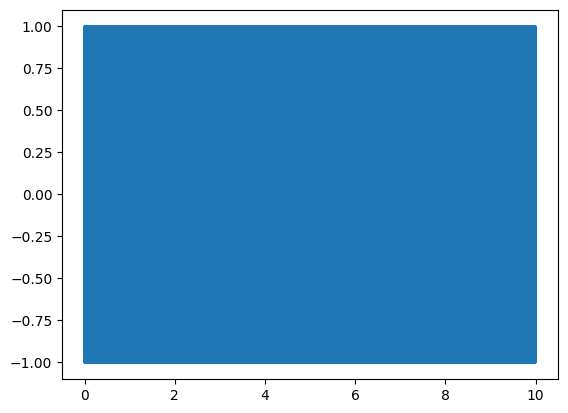

In [3]:
data = np.random.randint(0, 2, 10)

modulated_data = TC.chirp_modulate(data, 44e3, 1e3, 200, 1)
plt.plot(np.arange(len(modulated_data))/44e3, modulated_data)

In [4]:
noise = np.random.normal(0, 1, size=modulated_data.shape)
noisy_modulated_data = modulated_data + noise

delay_modulated_data = np.r_[ np.random.normal(0, 0.2, size= int(len(modulated_data)/(len(data) * 100))), noisy_modulated_data]

In [5]:
#data_out = TC.chirp_demodulate(delay_modulated_data, 44e3, 1e3, 200, 1, debug=False)

#print(data)
#print(data_out)

if np.array_equal(data, 1):
    print("Transmission successful")
else:
    print("Error during transmission")

Error during transmission


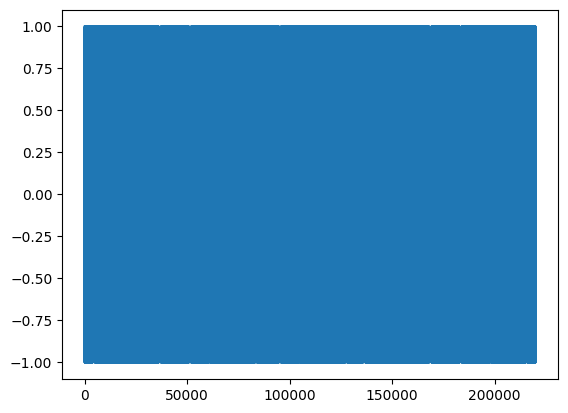

In [6]:
data = [0, 1, 1, 0, 1]
import scipy

modulated_data = TC.chirp_modulate(data, fs=44e3, fc = 8e3, bw = 2e3, T = 1)
TC.display_audio_signal(modulated_data, fs=44e3)
scipy.io.wavfile.write('Chirp.wav', int(44e3), np.array(32760 * modulated_data, dtype=np.int16))
plt.plot(modulated_data)

(500.0, 600.0)

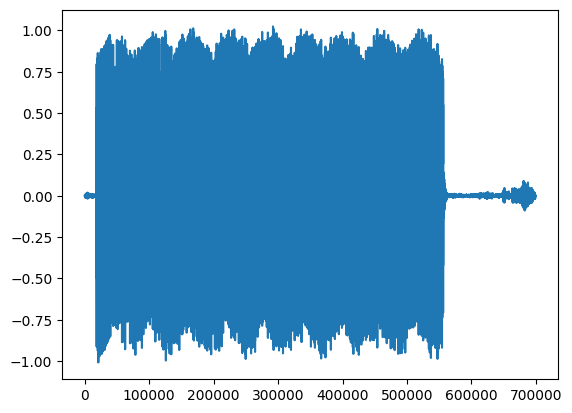

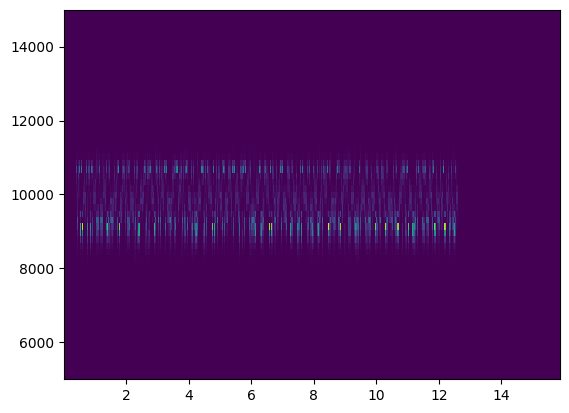

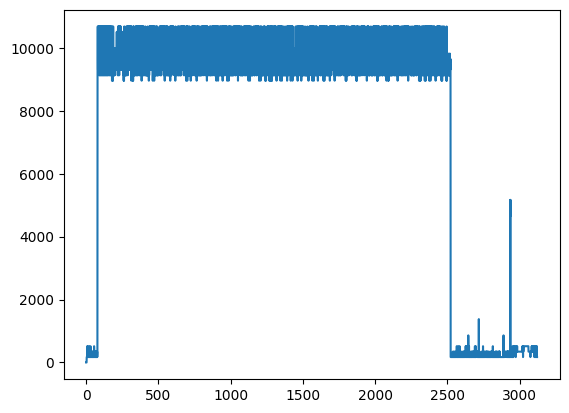

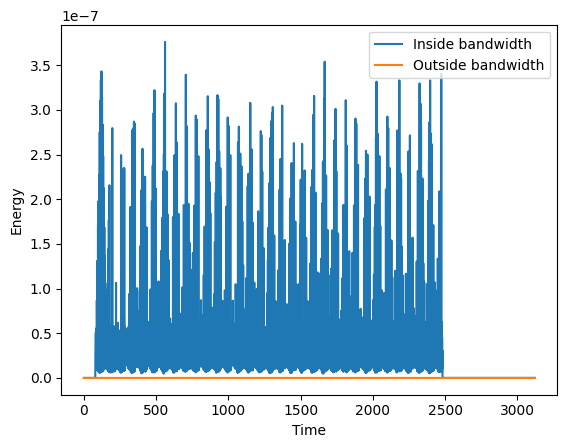

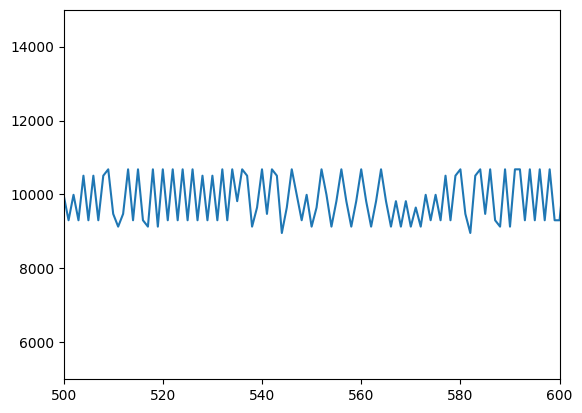

In [48]:
import scipy
fs, Chirp = scipy.io.wavfile.read('Chirp_text.wav')
Chirp = Chirp[:, 0]

# normalize the signal amplitude by dividing by the 10th maximum value(added by mimmo02)-------------------------------------
max = np.sort(np.abs(Chirp))[::-1][10]
Chirp = Chirp / max

plt.plot(Chirp)

f, t, X = sp.spectrogram(Chirp, fs)
plt.figure()
plt.pcolormesh(t, f, X)
plt.ylim(5e3, 15e3)

x_max = np.max(X, axis=0)
f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(f_max)


inside_band = np.abs(X[(f >= fc - bw/2) & (f <= fc + bw/2), :])**2
outside_band = np.abs(X[(f < fc - bw/2) | (f > fc + bw/2), :])**2

inside_energy = np.sum(inside_band, axis=0)
outside_energy = np.sum(outside_band, axis=0)

plt.figure()
plt.plot(inside_energy, label='Inside bandwidth')
plt.plot(outside_energy, label='Outside bandwidth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')

f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(f_max)
plt.ylim((fc - bw), (fc + bw))
plt.xlim(500, 600)


Recording... Press 'q' to stop.


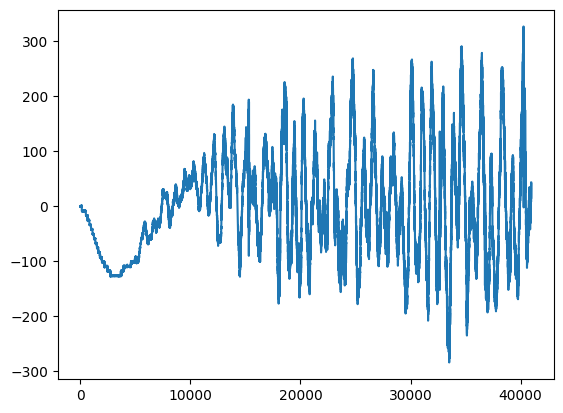

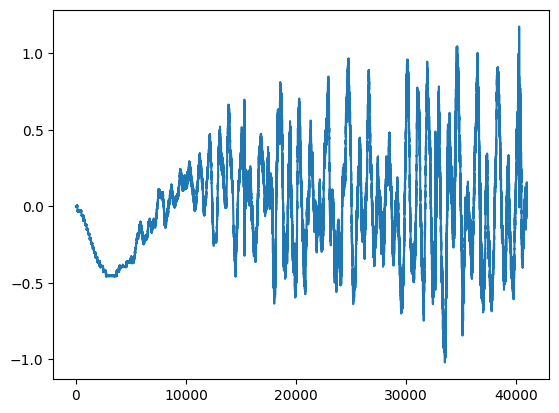

In [49]:
fs, Chirp = TC.record_audio()
plt.plot(Chirp)

max = np.sort(np.abs(Chirp))[::-1][10]
Chirp = Chirp / max

plt.figure()
plt.plot(Chirp)

scipy.io.wavfile.write('Chirp_rx.wav', int(44e3), np.array(32760 * Chirp, dtype=np.int16))

IndexError: index 0 is out of bounds for axis 0 with size 0

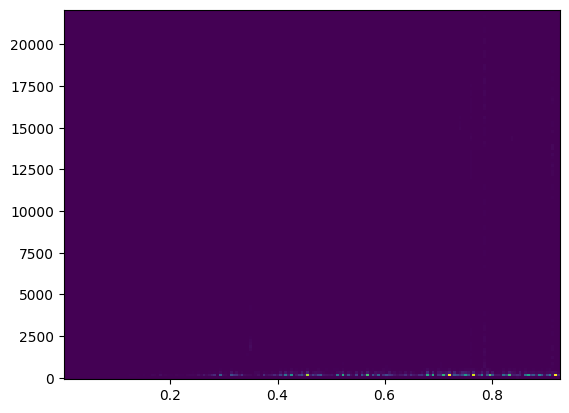

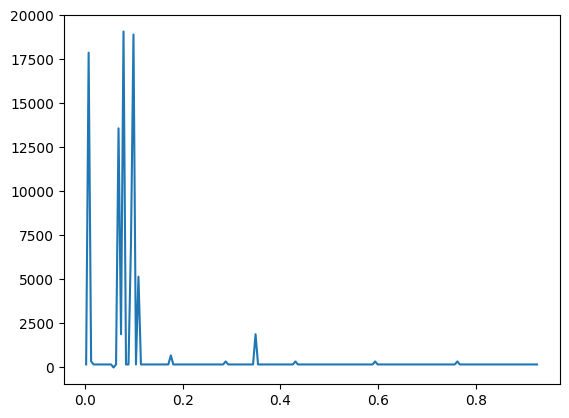

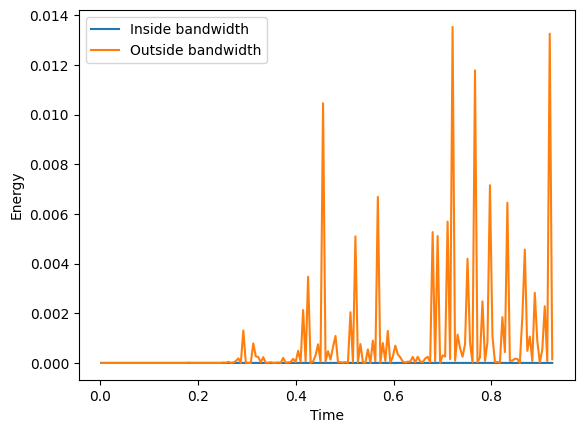

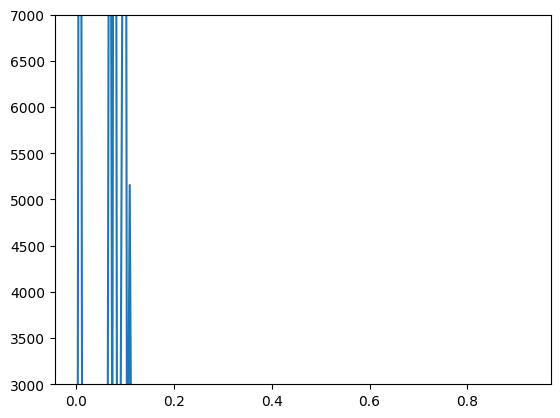

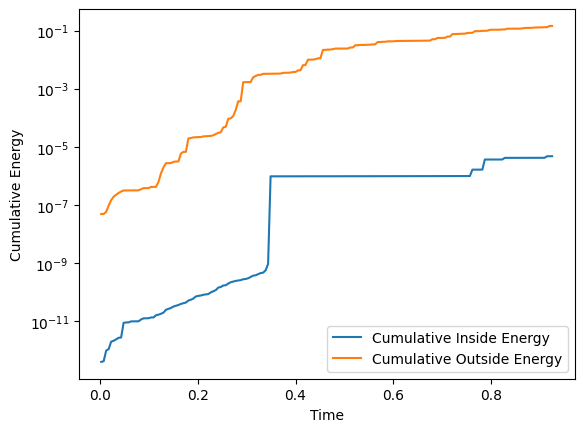

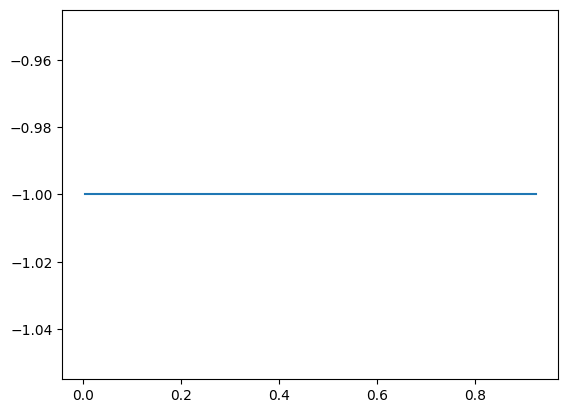

In [50]:
fs, Chirp = scipy.io.wavfile.read('Chirp_rx.wav')
Chirp = Chirp / 32760

fs = 44e3
fc = 5e3
bw = 2e3
T = 1


f, t, X = sp.spectrogram(Chirp, fs, scaling='spectrum')
plt.figure()
plt.pcolormesh(t, f, X)


f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(t, f_max)



inside_band = np.abs(X[(f >= 0.9*(fc - bw/2)) & (f <= 1.1*(fc + bw/2)), :])**2
outside_band = np.abs(X[(f < 0.9*(fc - bw/2)) | (f > 1.1*(fc + bw/2)), :])**2

inside_energy = np.sum(inside_band, axis=0)
outside_energy = np.sum(outside_band, axis=0)

plt.figure()
plt.plot(t, inside_energy, label='Inside bandwidth')
plt.plot(t, outside_energy, label='Outside bandwidth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')


f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(t, f_max)
plt.ylim((fc - bw), (fc + bw))


cum_inside_energy = np.cumsum(inside_energy)
cum_outside_energy = np.cumsum(outside_energy)

plt.figure()
plt.plot(t, cum_inside_energy, label='Cumulative Inside Energy')
plt.plot(t, cum_outside_energy, label='Cumulative Outside Energy')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Energy')
plt.yscale("log")


diff_cum_energy = cum_inside_energy - cum_outside_energy
plt.figure()
plt.plot(t, np.sign(diff_cum_energy))

index = np.where(np.diff(np.sign(diff_cum_energy)) == 2)[0][0]
time_start = t[index]
print(index)
print(time_start)

t_s = np.arange(len(Chirp)) / fs
index_1 = np.argmin(np.abs(t_s - time_start), axis = 0)
plt.figure()
plt.plot(t_s, Chirp)
plt.axvline(x = time_start, color = "red")


In [145]:
fs = 44e3
fc = 10e3
bw = 2e3

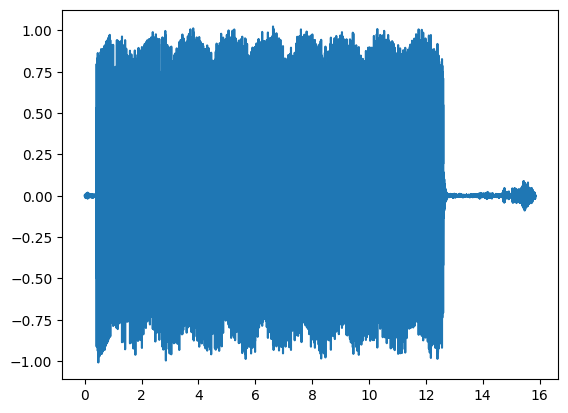

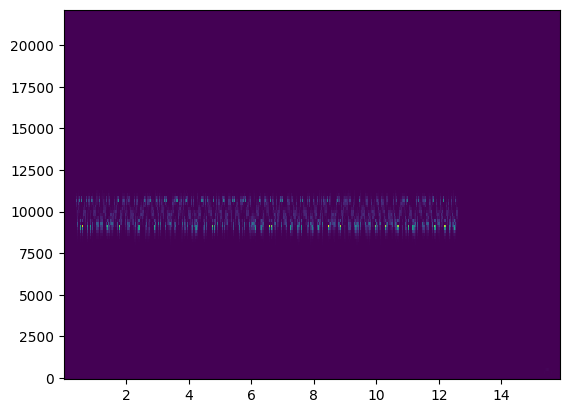

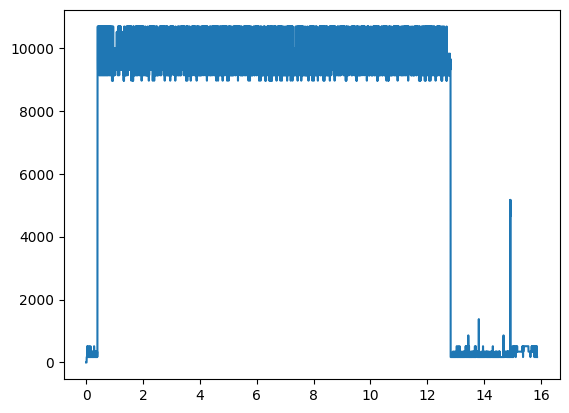

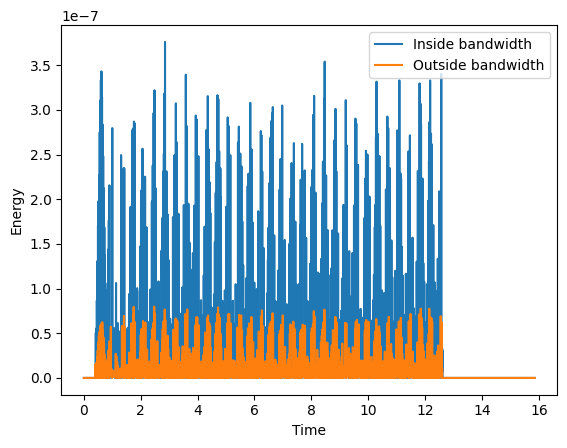

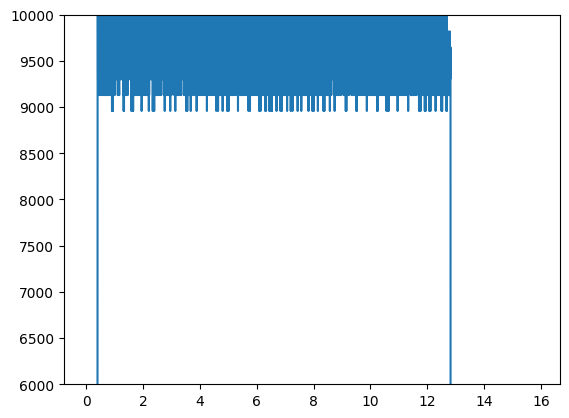

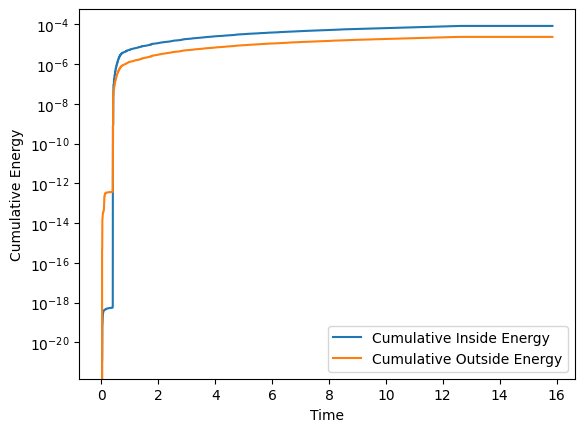

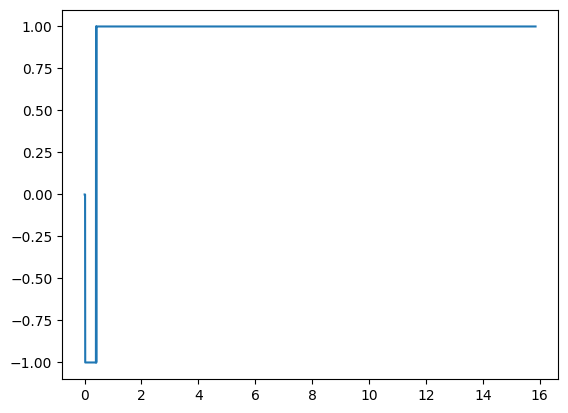

In [143]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
fs, Chirp = scipy.io.wavfile.read('Chirp_text.wav')
Chirp = Chirp[:, 0]
max = np.sort(np.abs(Chirp))[::-1][10]
Chirp = Chirp / max

t = np.arange(len(Chirp)) / fs
plt.plot(t, Chirp)

f, t, X = sp.spectrogram(Chirp, fs)

plt.figure()
plt.pcolormesh(t, f, X)


f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(t, f_max)



inside_band = np.abs(X[(f >= 0.9*(fc - bw/2)) & (f <= 1.1*(fc + bw/2)), :])**2
outside_band = np.abs(X[(f < 0.9*(fc - bw/2)) | (f > 1.1*(fc + bw/2)), :])**2

inside_energy = np.sum(inside_band, axis=0)
outside_energy = np.sum(outside_band, axis=0)

plt.figure()
plt.plot(t, inside_energy, label='Inside bandwidth')
plt.plot(t, outside_energy, label='Outside bandwidth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')

f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(t, f_max)
plt.ylim((fc - bw), (fc + bw))

cum_inside_energy = np.cumsum(inside_energy)
cum_outside_energy = np.cumsum(outside_energy)

plt.figure()
plt.plot(t, cum_inside_energy, label='Cumulative Inside Energy')
plt.plot(t, cum_outside_energy, label='Cumulative Outside Energy')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Energy')
plt.yscale("log")


diff_cum_energy = cum_inside_energy - cum_outside_energy
plt.figure()
plt.plot(t, np.sign(diff_cum_energy))


In [535]:
data = np.random.randint(0, 2, 100)

fs = 44e3
fc = 5e3
bw = 3e3
T = 0.05
import scipy

modulated_data = TC.chirp_modulate(data, fs=fs, fc = fc, bw = bw, T = T)
TC.display_audio_signal(modulated_data, fs=44e3)
scipy.io.wavfile.write('Chirp.wav', int(44e3), np.array(32760 * modulated_data, dtype=np.int16))


Recording... Press 'q' to stop.


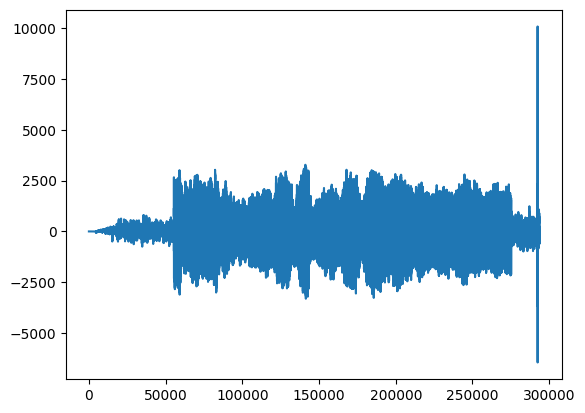

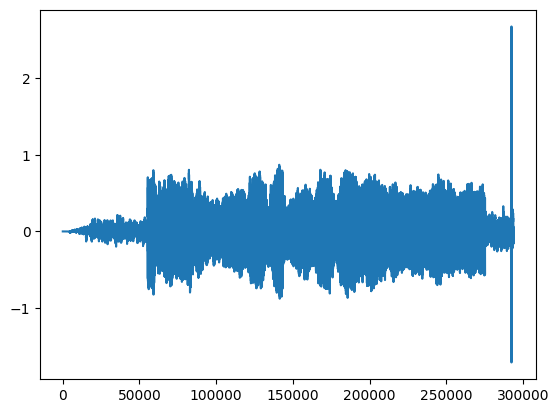

In [59]:
fs, Chirp = TC.record_audio()
plt.plot(Chirp)

max = np.sort(np.abs(Chirp))[::-1][10]
Chirp = Chirp / max

plt.figure()
plt.plot(Chirp)

scipy.io.wavfile.write('Chirp_rx1.wav', int(44e3), np.array(32760 * Chirp, dtype=np.int16))

max [0.2676363636363636, 0.3141818181818182, 0.36072727272727273, 0.384, 0.4189090909090909, 0.4421818181818182, 0.47709090909090907, 0.512, 0.5701818181818182, 0.6167272727272727, 0.6865454545454546, 0.7214545454545455, 0.7447272727272727, 0.7796363636363637, 0.8261818181818181, 0.8610909090909091, 0.9076363636363637, 0.9425454545454546, 0.9658181818181818, 1.024, 1.0589090909090908, 1.1054545454545455, 1.1287272727272728, 1.152, 1.245090909090909, 1.2916363636363637, 1.408, 1.4661818181818183, 3.5025454545454546, 3.572363636363636, 4.491636363636363, 6.504727272727273, 6.528, 6.597818181818182, 6.621090909090909, 6.667636363636364, 6.702545454545454, 6.737454545454545, 6.760727272727273, 6.807272727272728, 6.842181818181818, 6.888727272727273]
min [0.2792727272727273, 0.3490909090909091, 0.37236363636363634, 0.4072727272727273, 0.43054545454545456, 0.46545454545454545, 0.5003636363636363, 0.5236363636363637, 0.6050909090909091, 0.6632727272727272, 0.6981818181818182, 0.73309090909090

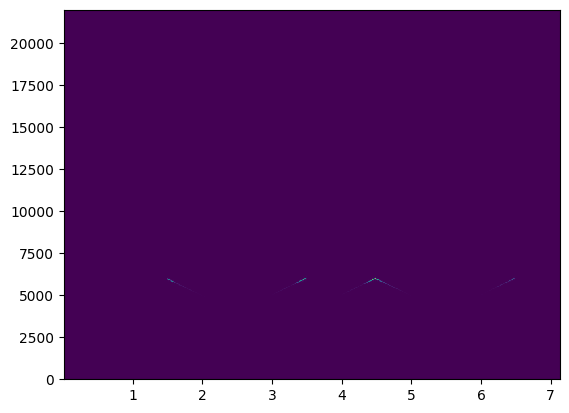

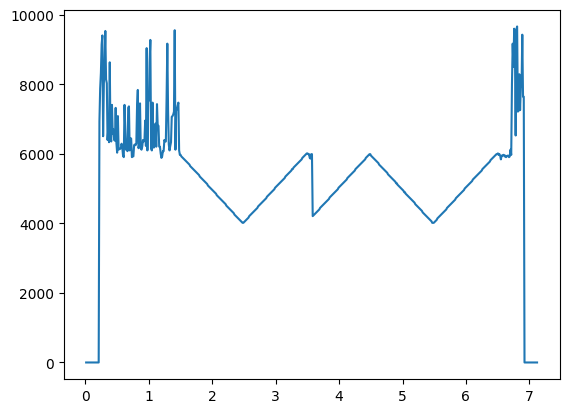

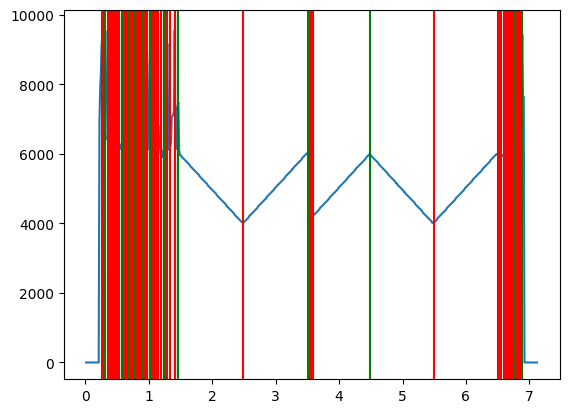

In [63]:
fs, Chirp = scipy.io.wavfile.read('Chirp_rx1.wav')
Chirp = Chirp / 32760

fs = 44e3
fc = 8e3
bw = 2e3
T = 1

lowcut = fc - bw
highcut = fc + bw

data = [0, 1, 1, 0, 1]

Chirp = butter_bandpass_filter(Chirp, lowcut, highcut, fs)
Chirp = np.r_[np.zeros(10000), Chirp, np.zeros(10000)]



f, t, X = sp.spectrogram(Chirp, fs, nperseg=1024, noverlap=512, nfft=2048, detrend='constant')
plt.figure()
plt.pcolormesh(t, f, X)


f_max = f[np.argmax(X, axis=0)]
plt.figure()
plt.plot(t, f_max)

def find_max_min_indexes(t, signal, low, high, error):
    max_indexes = []
    min_indexes = []
    state = "unknown"
    prev_value = signal[0]

    for i in range(len(signal)):
        if state == "unknown":
            if signal[i] > prev_value:
                state = "increasing"
                min_indexes.append(i-1)
            elif signal[i] < prev_value:
                state = "decreasing"
                max_indexes.append(i-1)

        elif state == "increasing":
            if signal[i] < prev_value:
                if error > (np.abs(signal[i-1] - high)/high ) and i > 1 :
                    max_indexes.append(t[i-1])
                    state = "decreasing"

        elif state == "decreasing":
            if signal[i] > prev_value:
                if error > (np.abs(signal[i-1] - low)/low )  and i > 1 :
                    min_indexes.append(t[i-1])
                    state = "increasing"

        prev_value = signal[i]


    return max_indexes, min_indexes

f_test = f_max
max_index, min_index = find_max_min_indexes(t, f_test, 7e3, 9e3, 1)

min_index = min_index[1:]

print("max " + str(max_index))
print("min " + str(min_index))

plt.figure()
plt.plot(t, f_test)


for i in range(len(max_index)) :
    plt.axvline(max_index[i], color = "green")

for i in range(len(min_index)) :
    plt.axvline(min_index[i], color = "red")

times = []

if max_index[0] < min_index[0]:
    print("max is before min (down first)")
    order = 0
    for i in range(len(max_index)) :
        if i < len(min_index) :
            times.append(min_index[i] - max_index[i])
        if i < len(max_index) - 1 :
            times.append(max_index[i + 1] - min_index[i])
else :
    print("min is before max (up first)")
    order = 1
    for i in range(len(min_index)) :
        if i < len(max_index) :
            times.append(max_index[i] - min_index[i])
        if i < len(min_index) - 1 :
            times.append(min_index[i + 1] - max_index[i])

data_out = []

for i in range(len(times)) :
    if 0.1 > (np.abs(times[i] - 1)/1 ) :
        data_out.append((order ^ (i % 2)))

print(times)
print(data)
print(data_out)

if np.array_equal(data, data_out):
    print("Transmission successful")
else:
    print("Error during transmission")

In [83]:
def find_start(signal, debug = False):
    signal = np.array(signal)
 
    # Replace the above line with the following code
    variance_sign = []
    var = []
    for i in range(50, len(signal), 10):
        actual_sign = np.sign(np.var(signal[i: i + 100]) - 0.25)
        variance_sign.append(actual_sign)
        if debug :
            var = np.r_[var, np.var(signal[i: i + 100]) - 0.25]
        if actual_sign == 1:
            break

    if debug:
        plt.figure()
        plt.plot(variance_sign)
 
   
    variance_sign = np.array(variance_sign)
    indice = np.where(np.diff(variance_sign) > 0)[0] - 50
    indice = 10 * indice

    # Check if indice is not empty
    if indice.size > 0:
        # Use the first valid index for slicing
        start_index = indice[0]  # Get the first index
        signal = signal[start_index:]  # Slice the signal from the first valid index
    else:
        print("No valid indices found.")
        return signal  # or handle as needed
 
    return signal, indice, var
 
def chirp_demodulate(received_signal, fs, fc = 10e3, bw = 2e3, T = 0.01, debug = False):

    # normalize the signal amplitude by dividing by the 10th maximum value(added by mimmo02)-------------------------------------
    max = np.sort(np.abs(received_signal))[::-1][10]
    received_signal = received_signal / max
 
    received_signal, indice = find_start(received_signal, debug=debug)
    
 
    t = np.arange(0, T, 1/fs)  # Time vector for the chirp
 
    up = np.cos(2 * np.pi * ((fc + bw/2) * t + ((fc - bw/2) - ((fc + bw/2))) / (2 * T) * t**2))
    down = np.cos(2 * np.pi * ((fc - bw/2) * t + ((fc + bw/2) - (fc - bw/2)) / (2 * T) * t**2))
 
    result = []
 
    nyq = 0.5 * fs
    normal_cutoff = 0.5*fc / nyq
    b, a = butter(5, normal_cutoff, btype='low', analog=False)
 
 
 
    for i in range(int(len(received_signal)/len(t))) :
        signal_up = received_signal[i*len(t): (i + 1)*len(t)] * up
        signal_down = received_signal[i*len(t): (i + 1)*len(t)] * down
 
        signal_up = filtfilt(b, a, signal_up)
        signal_down = filtfilt(b, a, signal_down)
 
 
        mean_up = signal_up.sum() / len(signal_up)
        mean_down = signal_down.sum() / len(signal_down)
 
        var_up = np.var(signal_up)
        var_down = np.var(signal_down)
 
        if mean_up > mean_down and var_up < var_down/2 :
            result.append(0)
        elif mean_down > mean_up and var_down < var_up/2 :
            result.append(1)
        else :
            if debug:
                result.append(-1)
 
       
        if debug :
            max = 1.5*np.max(np.abs(np.r_[received_signal[i*len(t): (i + 1)*len(t)], signal_up, signal_down]))
            fig, axs = plt.subplots(3)
            axs[0].plot(received_signal[i*len(t): (i + 1)*len(t)], "b")
            axs[0].set(ylim=[-max, max])
 
            axs[1].plot(signal_up, "r")
            axs[1].set_title(str("mean up :" + str(round(mean_up, 3))) + " / var up :" + str(round(np.var(signal_up), 3)))
            axs[1].set(ylim=[-max, max])
 
            axs[2].plot(signal_down, "g")
            axs[2].set_title(str("mean down :" + str(round(mean_down, 3)) + " / var down :" + str(round(np.var(signal_down), 3))))
            axs[2].set(ylim=[-max, max])
 
            plt.tight_layout()
            plt.show()
 
            if i == 0 :
                signal_up_all = signal_up
                signal_down_all = signal_down
            else :
                signal_up_all = np.concatenate((signal_up_all, signal_up))
                signal_down_all = np.concatenate((signal_down_all, signal_down))
 
    if debug :
        fig, axs = plt.subplots(3)
        axs[0].plot(received_signal, "b")
 
        axs[1].plot(signal_up_all, "r")
 
        axs[2].plot(signal_down_all, "g")
 
        plt.tight_layout()
        plt.show()
 
 
    if debug : 
        return np.array(result), indice
    else :
        return np.array(result)


In [154]:
data = np.random.randint(0, 2, 1000)
modulated_signal = TC.chirp_modulate(data, 44e3, 10e3, 2e3, 0.01)
modulated_signal = np.r_[np.zeros(1000), modulated_signal ,np.zeros(1000)]
modulated_signal += np.random.normal(0, 0.1, len(modulated_signal))


In [ ]:
Chirp = modulated_signal
max = np.sort(np.abs(Chirp))[::-1][10]
Chirp = Chirp / max


fc = 10e3
bw = 2e3
fs = 44e3

from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

lowcut = 0.9*(fc - bw/2)
highcut = 1.1*(fc + bw/2)
Chirp = butter_bandpass_filter(Chirp, lowcut, highcut, fs)

Period = 10/(fc - bw/2)
print(Period)
step = int(Period*fs)
print(step)
inside_energy = []
outside_energy = []

for i in range(0, len(Chirp), step):
    signal = Chirp[i : (i + step)]
    if len(signal) > 0:
        fft_chirp = np.fft.rfft(signal)
        freq = np.fft.rfftfreq(len(signal), d=1/fs)
        band_mask = (freq >= (fc - bw/2)) & (freq <= (fc + bw/2))
        inside_band = np.where(band_mask, fft_chirp, 0)
        outside_band = fft_chirp - inside_band
        plt.figure()
        plt.plot(np.abs(inside_band))
        plt.plot(np.abs(outside_band))
        inside_energy.append(np.sum(np.abs(inside_band)/len(inside_band))**2)
        outside_energy.append(np.sum(np.abs(outside_band)/len(outside_band))**2)


fft_chirp = np.abs(np.fft.rfft(Chirp))
freq = np.fft.rfftfreq(len(Chirp), d=1/fs)   

plt.plot(freq, fft_chirp)

plt.figure()
plt.plot(inside_energy, label = 'Inside Band')
plt.plot(outside_energy, label = 'Outside Band')
plt.legend()


plt.figure()
plt.plot(Chirp)

print(np.sum(inside_energy))
print(np.sum(outside_energy))

0.0011111111111111111
48


C:\Users\stein\AppData\Local\Temp\ipykernel_168800\2624768773.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


KeyboardInterrupt: 